<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/07-trees/DecisionTrees_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

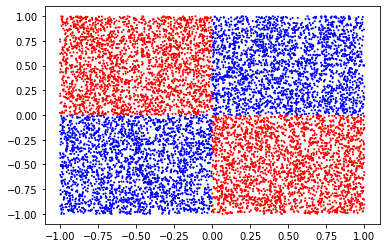

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

In [30]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# create dataset
toy_data = pd.DataFrame(np.random.uniform(-1,1,size=(10000,2)))
toy_data.columns = ['X1', 'X2']
toy_data['y'] = ((toy_data['X1'] >= 0) ^ (toy_data['X2'] >= 0)).astype(int)

(Text(0.5, 0, 'X1'), Text(0, 0.5, 'X2'))

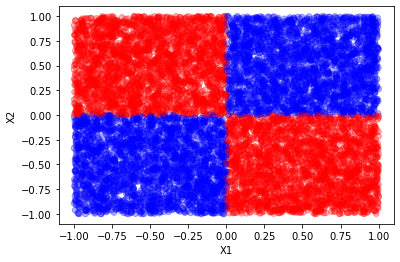

In [11]:
# check toy_dataset
plt.scatter(toy_data['X1'], toy_data['X2'], c=toy_data['y'], alpha=0.3, cmap='bwr')
plt.xlabel('X1'), plt.ylabel('X2')

In [19]:
X_toy_train, X_toy_test, y_toy_train, y_toy_test = \
    train_test_split(toy_data[['X1', 'X2']], toy_data['y'], test_size=0.25)

From here we got the max_depth would be 4

In [34]:
max_depth = 1
Flag = False
while Flag == False:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_toy_train, y_toy_train)
    if model.score(X_toy_train, y_toy_train) >= 0.99:
        break
    max_depth += 1
model_99 = model
max_depth

4

plot the data with the decision boundary for the obtained model

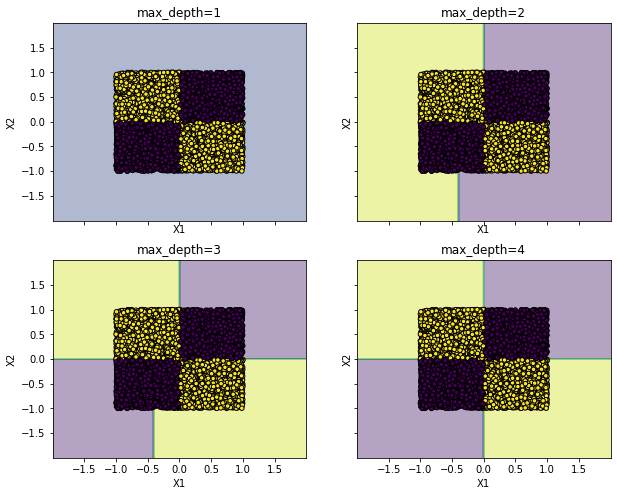

In [43]:
from sklearn.inspection import DecisionBoundaryDisplay
from itertools import product
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, pairidx, tt in zip(
    product([0, 1], [0, 1]),
    [1, 2, 3, 4],
    ["max_depth=1", "max_depth=2", "max_depth=3", "max_depth=4"],
):
    clf = DecisionTreeClassifier(max_depth=pairidx).fit(X_toy_train, y_toy_train)
    
    DecisionBoundaryDisplay.from_estimator(
        clf, X_toy_train, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X_toy_train["X1"], X_toy_train["X2"], c=y_toy_train, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

observe the tree structure

[Text(0.6041666666666666, 0.9, 'X[1] <= 0.996\ngini = 0.5\nsamples = 7500\nvalue = [3737, 3763]'),
 Text(0.375, 0.7, 'X[0] <= -0.415\ngini = 0.5\nsamples = 7486\nvalue = [3736, 3750]'),
 Text(0.16666666666666666, 0.5, 'X[1] <= -0.0\ngini = 0.499\nsamples = 2202\nvalue = [1046, 1156]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 1046\nvalue = [1046, 0]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1156\nvalue = [0, 1156]'),
 Text(0.5833333333333334, 0.5, 'X[1] <= 0.001\ngini = 0.5\nsamples = 5284\nvalue = [2690, 2594]'),
 Text(0.4166666666666667, 0.3, 'X[0] <= 0.0\ngini = 0.42\nsamples = 2642\nvalue = [792, 1850]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.003\nsamples = 793\nvalue = [792, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1849\nvalue = [0, 1849]'),
 Text(0.75, 0.3, 'X[0] <= -0.001\ngini = 0.405\nsamples = 2642\nvalue = [1898, 744]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 744\nvalue = [0, 744]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 1

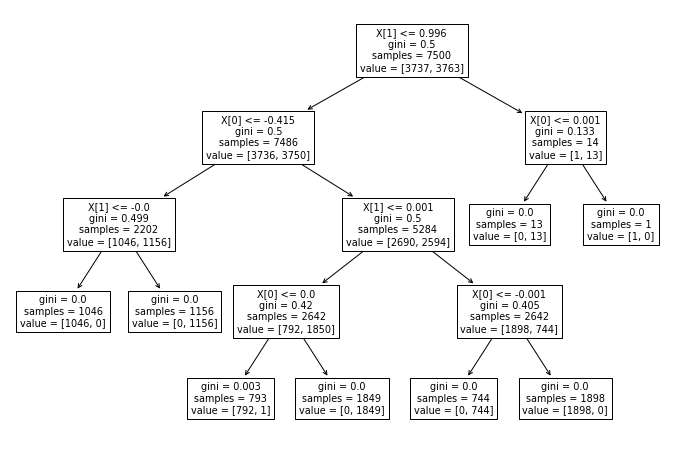

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(12, 8))
tree.plot_tree(model_99)

# Task 2 (3 points)

Consider the following dataset:

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [127]:
y_value_dict = {'malignant' : 1, 'benign' : 0}
y_train = np.array(list(map(y_value_dict.get, y_train)))
y_test = np.array(list(map(y_value_dict.get, y_test)))

In [156]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import roc_curve, roc_auc_score
import pickle

class_weight = {1: 2., 0: 1.}
best_layer = 0
max_RA_score = 0

for depth in range(1, 11):
    model_bc = DecisionTreeClassifier(max_depth=depth, class_weight=class_weight)
    model_bc.fit(X_train, y_train)
    predictions = model_bc.predict(X_test)
    best_layer = depth if max_RA_score < roc_auc_score(y_test, predictions) else best_layer
    pickle.dump(model_bc,open("tree1.dat","wb")) if max_RA_score < roc_auc_score(y_test, predictions) else True
    max_RA_score = roc_auc_score(y_test, predictions) if max_RA_score < roc_auc_score(y_test, predictions) else max_RA_score
    

print("best_layer: ", best_layer)
print("max_RA_score: ", round(max_ra_score,2))

best_layer:  3
max_RA_score:  0.93


In [149]:
# Compute Area Under the Curve (AUC) using the trapezoidal rule.
from sklearn.metrics import auc

class_weight = {1: 2., 0: 1.}
best_layer = 0
max_AUC_score = 0

for depth in range(1, 11):
    model_bc = DecisionTreeClassifier(max_depth=depth, class_weight=class_weight)
    model_bc.fit(X_train, y_train)
    predictions = model_bc.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, predictions)
    best_layer = depth if max_AUC_score < auc(fpr, tpr) else best_layer
    pickle.dump(model_bc,open("tree2.dat","wb")) if max_AUC_score < auc(fpr, tpr) else True
    max_AUC_score = auc(fpr, tpr) if max_AUC_score < auc(fpr, tpr) else max_AUC_score

print("best_layer: ", best_layer)
print("max_AUC_score: ", round(max_AUC_score,2))

best_layer:  5
max_AUC_score:  0.93


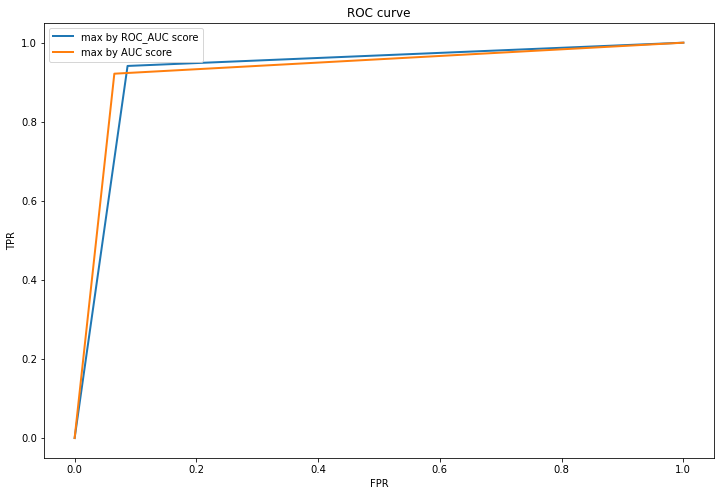

In [158]:
# plot 2 curves
loaded_model_1 = pickle.load(open("tree1.dat","rb"))
loaded_model_2 = pickle.load(open("tree2.dat","rb"))

predictions_1 = loaded_model_1.predict(X_test)
fpr_1, tpr_1, _ = roc_curve(y_test, predictions_1)

predictions_2 = loaded_model_2.predict(X_test)
fpr_2, tpr_2, _ = roc_curve(y_test, predictions_2)


plt.figure(figsize=(12, 8))
plt.plot(fpr_1, tpr_1, linewidth=2, label="max by ROC_AUC score")
plt.plot(fpr_2, tpr_2, linewidth=2, label="max by AUC score")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()